<a href="https://colab.research.google.com/github/divyansshu/google-colab/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from tensorflow.keras.layers import Input
model = Sequential([
    Input(shape=(28, 28)),  # Flatten 28x28 images into a 1D array
    Flatten(),
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8630 - loss: 0.4846 - val_accuracy: 0.9559 - val_loss: 0.1552
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9597 - loss: 0.1374 - val_accuracy: 0.9641 - val_loss: 0.1193
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9736 - loss: 0.0889 - val_accuracy: 0.9702 - val_loss: 0.0990
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9807 - loss: 0.0644 - val_accuracy: 0.9721 - val_loss: 0.0923
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9867 - loss: 0.0465 - val_accuracy: 0.9753 - val_loss: 0.0836


In [7]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9715 - loss: 0.0906
Test Loss: 0.07663539052009583
Test Accuracy: 0.9758999943733215


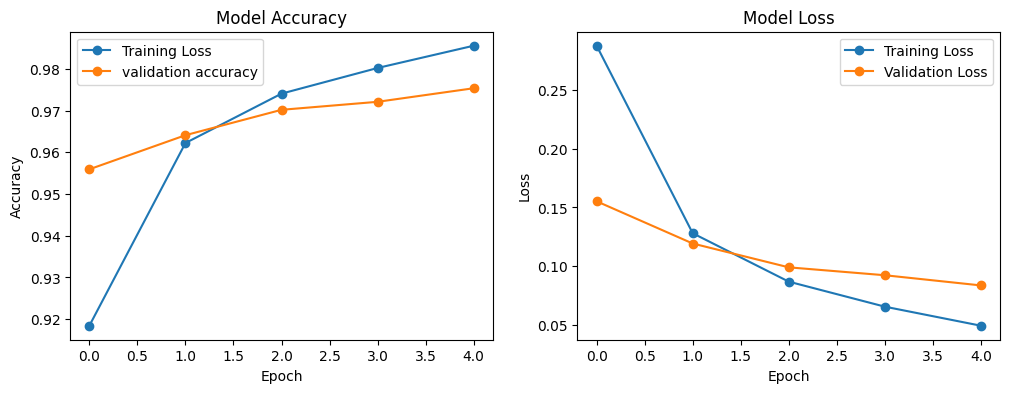

In [11]:
# visualising the training process
# plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Loss', marker='o')
plt.plot(history.history['val_accuracy'], label='validation accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


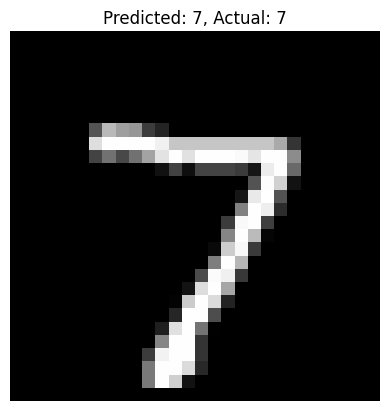

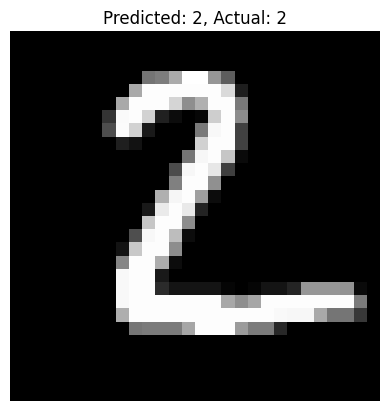

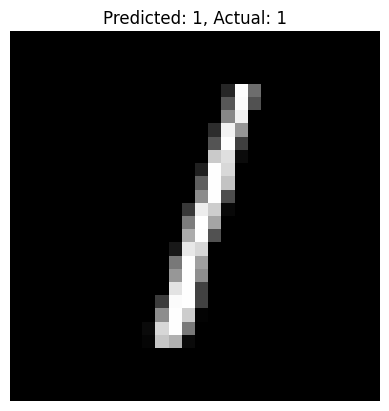

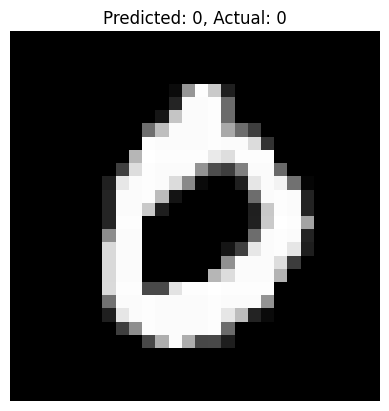

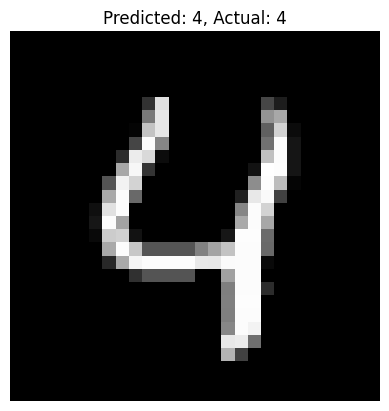

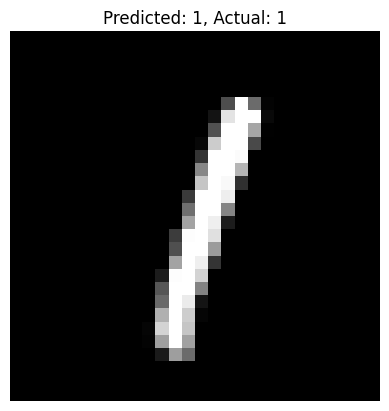

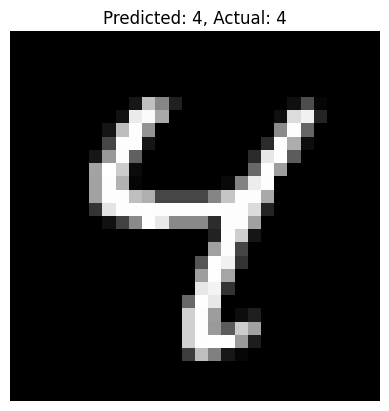

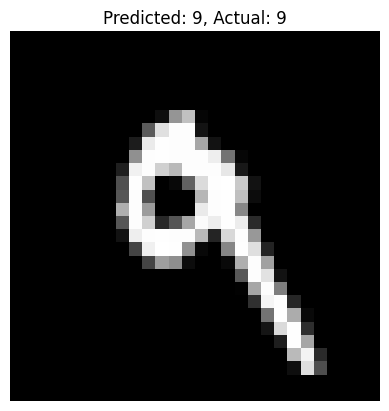

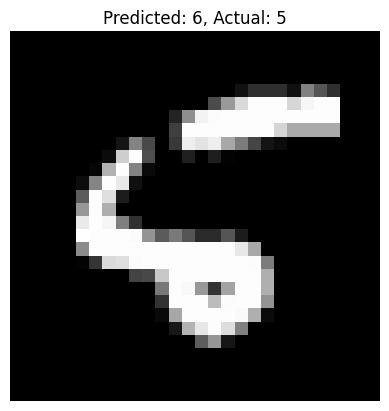

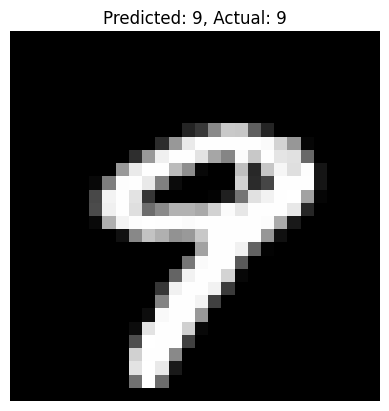

In [12]:
# Make predictions on the test data
predictions = model.predict(x_test)

for i in range(10):
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
  plt.axis('off')
  plt.show()